In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
task_name = 'diabetes_new_methods' #'diabetes_regr' '588'
task = "regression" #"classification" #"regression"
baseline = False
ablation_directory = f'./results/mdi_local.real_data_{task}/{task_name}/varying_sample_row_n'
#ablation_directory = f'./results/mdi_local.synthetic_data_linear/{task_name}/varying_heritability_n'
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
combined_df_rf_plus = pd.DataFrame()
for file in os.listdir(rf_plus_directory):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(rf_plus_directory, file))
        combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [3]:
combined_df

sample_row_n sample_row_n_name  rep  n_estimators  min_samples_leaf  \
0             NaN     keep_all_rows    0           100                 5   
1             NaN     keep_all_rows    0           100                 5   
2             NaN     keep_all_rows    0           100                 5   
3             NaN     keep_all_rows    0           100                 5   
4             NaN     keep_all_rows    0           100                 5   
..            ...               ...  ...           ...               ...   
165           NaN     keep_all_rows    0           100                 5   
166           NaN     keep_all_rows    0           100                 5   
167           NaN     keep_all_rows    0           100                 5   
168           NaN     keep_all_rows    0           100                 5   
169           NaN     keep_all_rows    0           100                 5   

     max_features  random_state model  \
0            0.33            42    RF   
1            0.33            42    RF   
2            0.33            42    RF   
3            0.33            42    RF   
4            0.33            42    RF   
..            ...           ...   ...   
165          0.33            42    RF   
166          0.33            42    RF   
167          0.33            42    RF   
168          0.33            42    RF   
169          0.33            42    RF   

                                                    fi  train_size  \
0                                  Kernel_SHAP_RF_plus         296   
1                                         LIME_RF_plus         296   
2                         Local_MDI+_fit_on_OOB_RFPlus         296   
3      Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept         296   
4      Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean         296   
..                                                 ...         ...   
165  Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_s...         296   
166  Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_s...         296   
167                     Local_MDI+_fit_on_inbag_RFPlus         296   
168                                             Random         296   
169                                        TreeSHAP_RF         296   

     train_subset_size  test_size  test_subset_size  num_features  \
0                  100        146               100            10   
1                  100        146               100            10   
2                  100        146               100            10   
3                  100        146               100            10   
4                  100        146               100            10   
..                 ...        ...               ...           ...   
165                100        146               100            10   
166                100        146               100            10   
167                100        146               100            10   
168                100        146               100            10   
169                100        146               100            10   

     data_split_seed  num_features_masked  sample_train_0  sample_train_1  \
0                  7                   10             274             155   
1                  7                   10             274             155   
2                  7                   10             274             155   
3                  7                   10             274             155   
4                  7                   10             274             155   
..               ...                  ...             ...             ...   
165                5                   10             274             155   
166                5                   10             274             155   
167                5                   10             274             155   
168                5                   10             274             155   
169                5                   10             274             155   

    

In [4]:
# combined_df = combined_df[(combined_df['heritability'] == 0.8) & (combined_df['n'] == 1000)]

In [5]:
df = pd.DataFrame(combined_df_rf_plus)
averages = df.groupby('Model').mean().reset_index()
pd.DataFrame(averages)

Model          MSE        R2       Time
0             RF  3167.113203  0.446033   0.168963
1        RF_plus  2963.987842  0.481677  45.557478
2  RF_plus_inbag  3164.298627  0.446532   0.958697
3    RF_plus_oob  2973.007123  0.480600  47.521018

### Summarise the Ablation Data

In [6]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 296 and the test size is 146


In [7]:
combined_df["fi"].unique()

array(['Kernel_SHAP_RF_plus', 'LIME_RF_plus',
       'Local_MDI+_fit_on_OOB_RFPlus',
       'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
       'Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean',
       'Local_MDI+_fit_on_OOB_RFPlus_subtract_train_mean',
       'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
       'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept',
       'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_pred_mean',
       'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_train_mean',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_pred_mean',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_train_mean',
       'Local_MDI+_fit_on_inbag_RFPlus', 'Random', 'TreeSHAP_RF'],
      dtype=object)

In [8]:
def remove_elements(list1, list2):
    """
    Remove elements from list1 that are present in list2.
    
    Parameters:
    list1 (list): The original list.
    list2 (list): The list of elements to remove from list1.
    
    Returns:
    list: A new list with elements from list1, excluding those found in list2.
    """
    return [element for element in list1 if element not in list2]

### Plot the Ablation Data Performance

In [9]:
# methods_train_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
#                         'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
#                         'TreeSHAP_RF']#, 'Local_MDI+_global_MDI_plus_RFPlus']
# methods_test_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
#                         'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
#                         'TreeSHAP_RF']#, 'Local_MDI+_global_MDI_plus_RFPlus']
# methods_test = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
#                 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus',
#                  'TreeSHAP_RF']#, 'Local_MDI+_global_MDI_plus_RFPlus']

# new_methods = [ 'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
#        'Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean',
#        'Local_MDI+_fit_on_OOB_RFPlus_subtract_train_mean',
#        'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept',
#        'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_pred_mean',
#        'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_train_mean',
#        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept',
#        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_pred_mean',
#        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_train_mean']
# methods_train_subset.extend(new_methods)
# methods_test_subset.extend(new_methods)
# methods_test.extend(new_methods)

# old_methods = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus','Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus']
# methods_train_subset = remove_elements(methods_train_subset, old_methods)
# methods_test_subset = remove_elements(methods_test_subset, old_methods)
# methods_test = remove_elements(methods_test, old_methods)

# if baseline:
#     methods_train_subset.append('Random')
#     methods_test_subset.append('Random')
#     methods_test.append('Random')
#     methods_test_subset.append('Oracle_test_RFPlus')
#     methods_test.append('Oracle_test_RFPlus')

methods_train_subset = ['Kernel_SHAP_RF_plus', 'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus', 'LIME_RF_plus',
                        'TreeSHAP_RF']
methods_test_subset = ['Kernel_SHAP_RF_plus', 'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus', 'LIME_RF_plus',
                        'TreeSHAP_RF']
methods_test = ['Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus',
                        'TreeSHAP_RF']

num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "Kernel_Ridge", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [10]:
# color_map = {
#     'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
#     'Local_MDI+_fit_on_OOB_RFPlus': '#ff7f0e',  # orange
#     'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#2ca02c',  # green
#     'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#d62728',  # red
#     'Local_MDI+_fit_on_inbag_RFPlus': '#9467bd',  # purple
#     'LIME_RF_plus': '#8c564b',  # brown
#     'Oracle_test_RFPlus': '#e377c2',  # pink
#     'Random': '#7f7f7f',  # gray
#     'TreeSHAP_RF': '#bcbd22',  # yellow
#     'Local_MDI+_global_MDI_plus_RFPlus': '#17becf'  # cyan
# }
color_map = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
    'LIME_RF_plus': '#ff7f0e',        # orange
    # 'Local_MDI+_fit_on_OOB_2': '#ffeb3b',  # green
    'Local_MDI+_fit_on_OOB_RFPlus': '#d62728',  # red
    'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept': '#9467bd',  # purple
    'Local_MDI+_fit_on_OOB_RFPlus_subtract_train_mean': '#8c564b',  # brown
    'Local_MDI+_fit_on_OOB_RFPlus_subtract_pred_mean': '#e377c2',  # pink
    # 'Local_MDI+_fit_on_all_evaluate_on_all_2': '#7f7f7f',  # gray
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#17becf',  # cyan
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept': '#2ca02c',  # yellow
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_train_mean': '#d62728',  # red
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_pred_mean': '#9467bd',  # purple
    # 'Local_MDI+_fit_on_all_evaluate_on_oob_2': '#8c564b',  # brown
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#f7b6d2',  # magenta
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept': '#7f7f7f',  # gray
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_train_mean': '#ffeb3b',  # yellow
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_pred_mean': '#e377c2',  # pink
    'Local_MDI+_fit_on_inbag_RFPlus': '#00ff00',  # lime
    'Random': '#000000',  # black
    'TreeSHAP_RF': '#d62728'  # teal
}

#### Training Subset Data

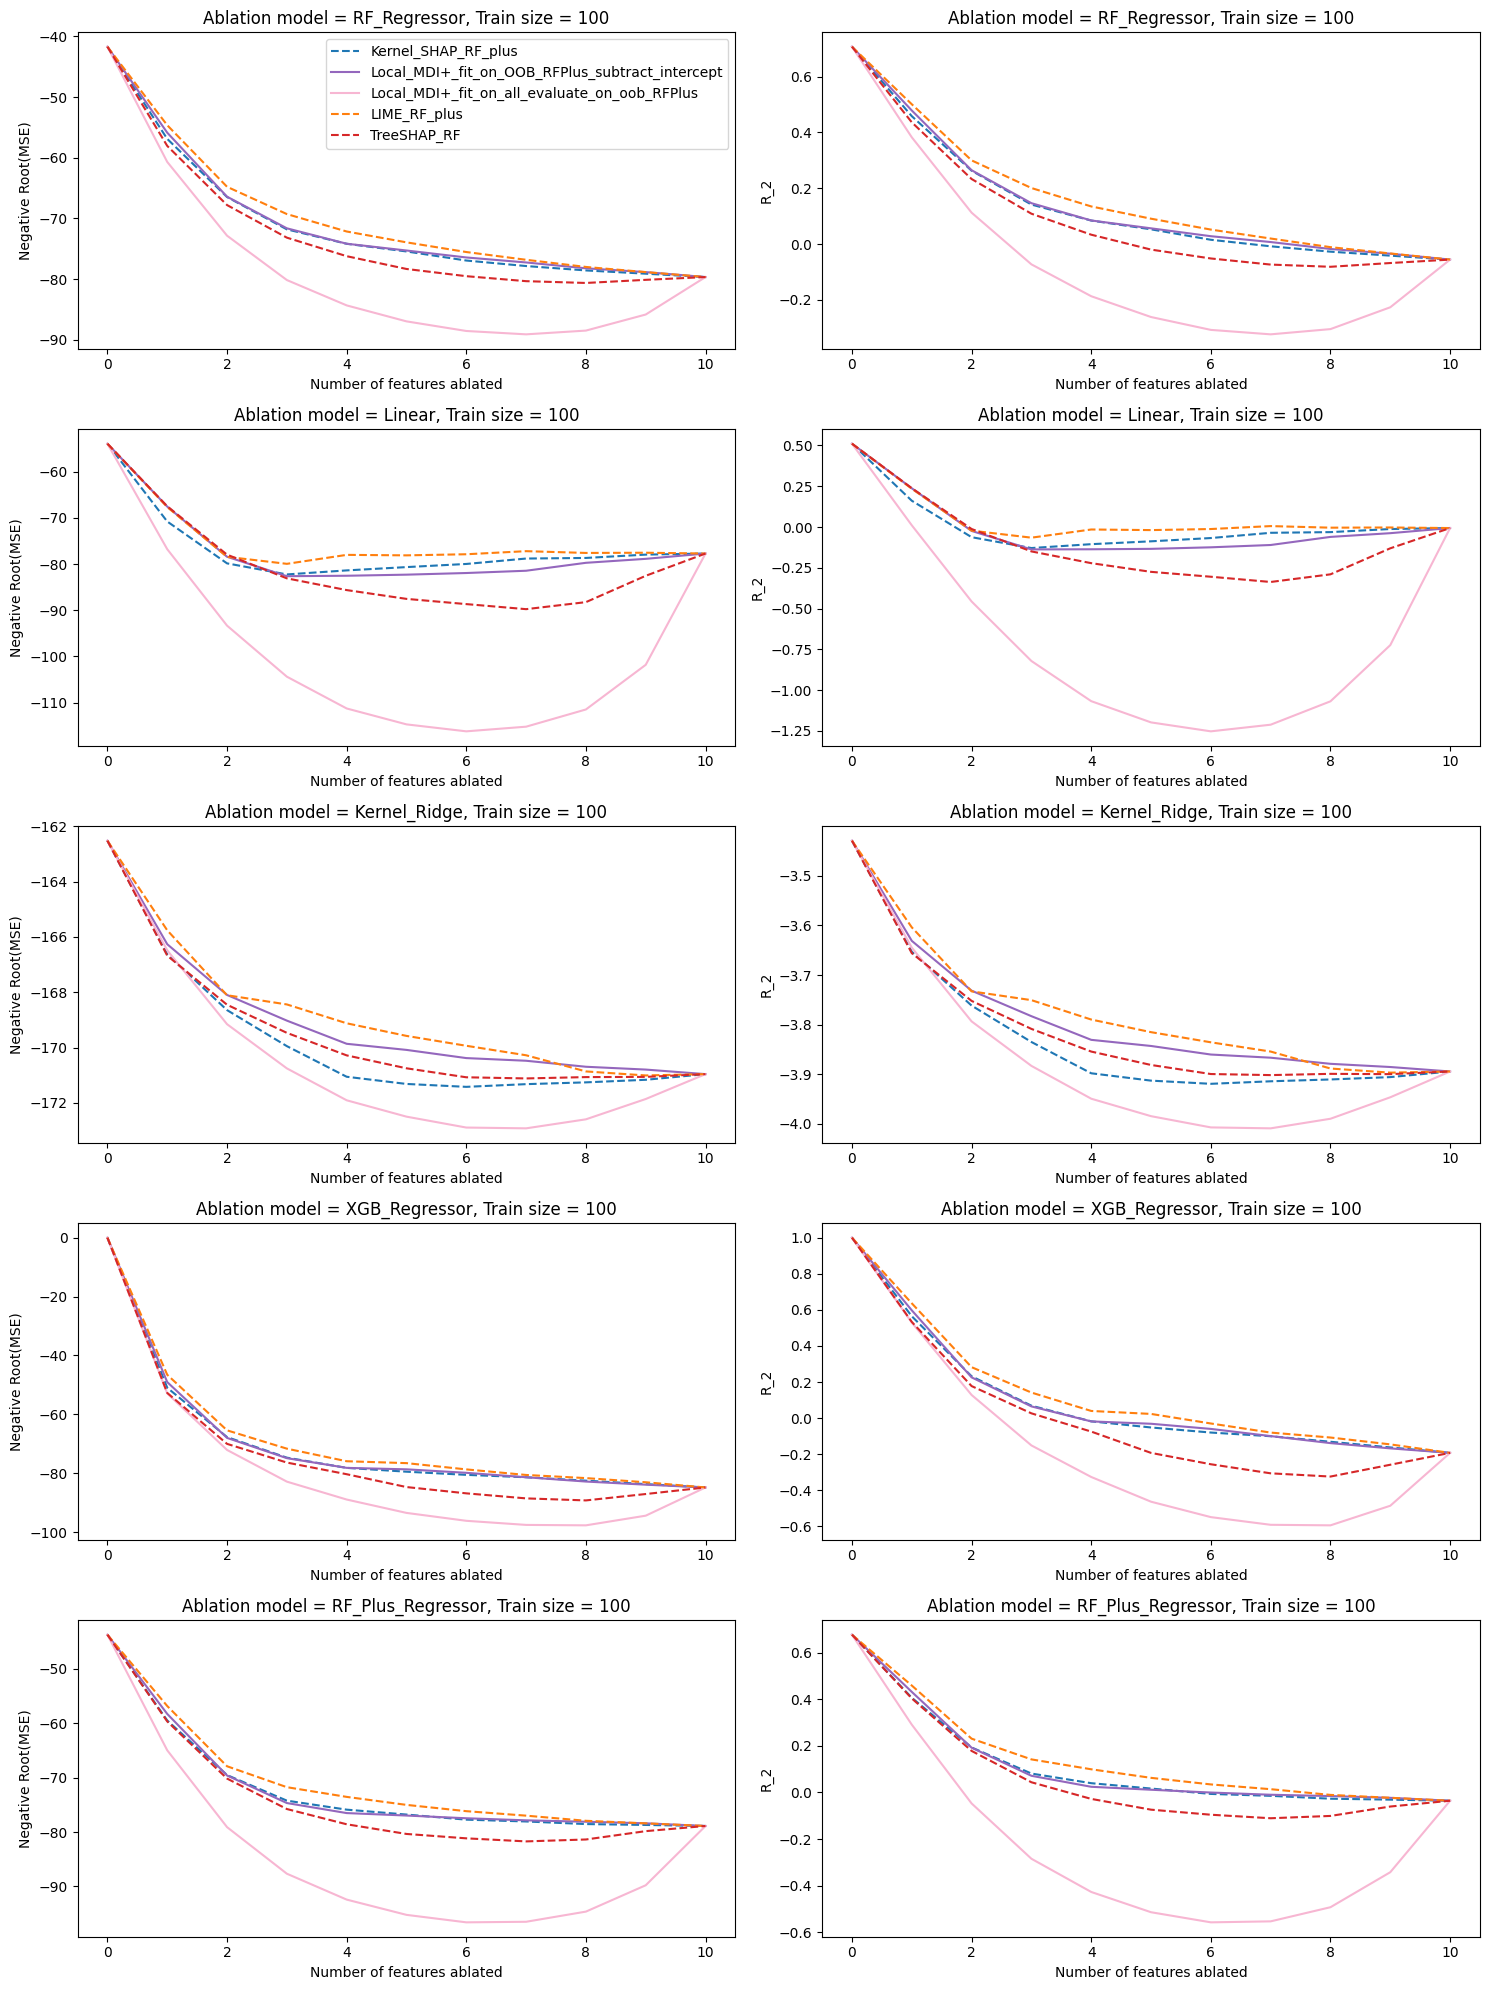

In [11]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

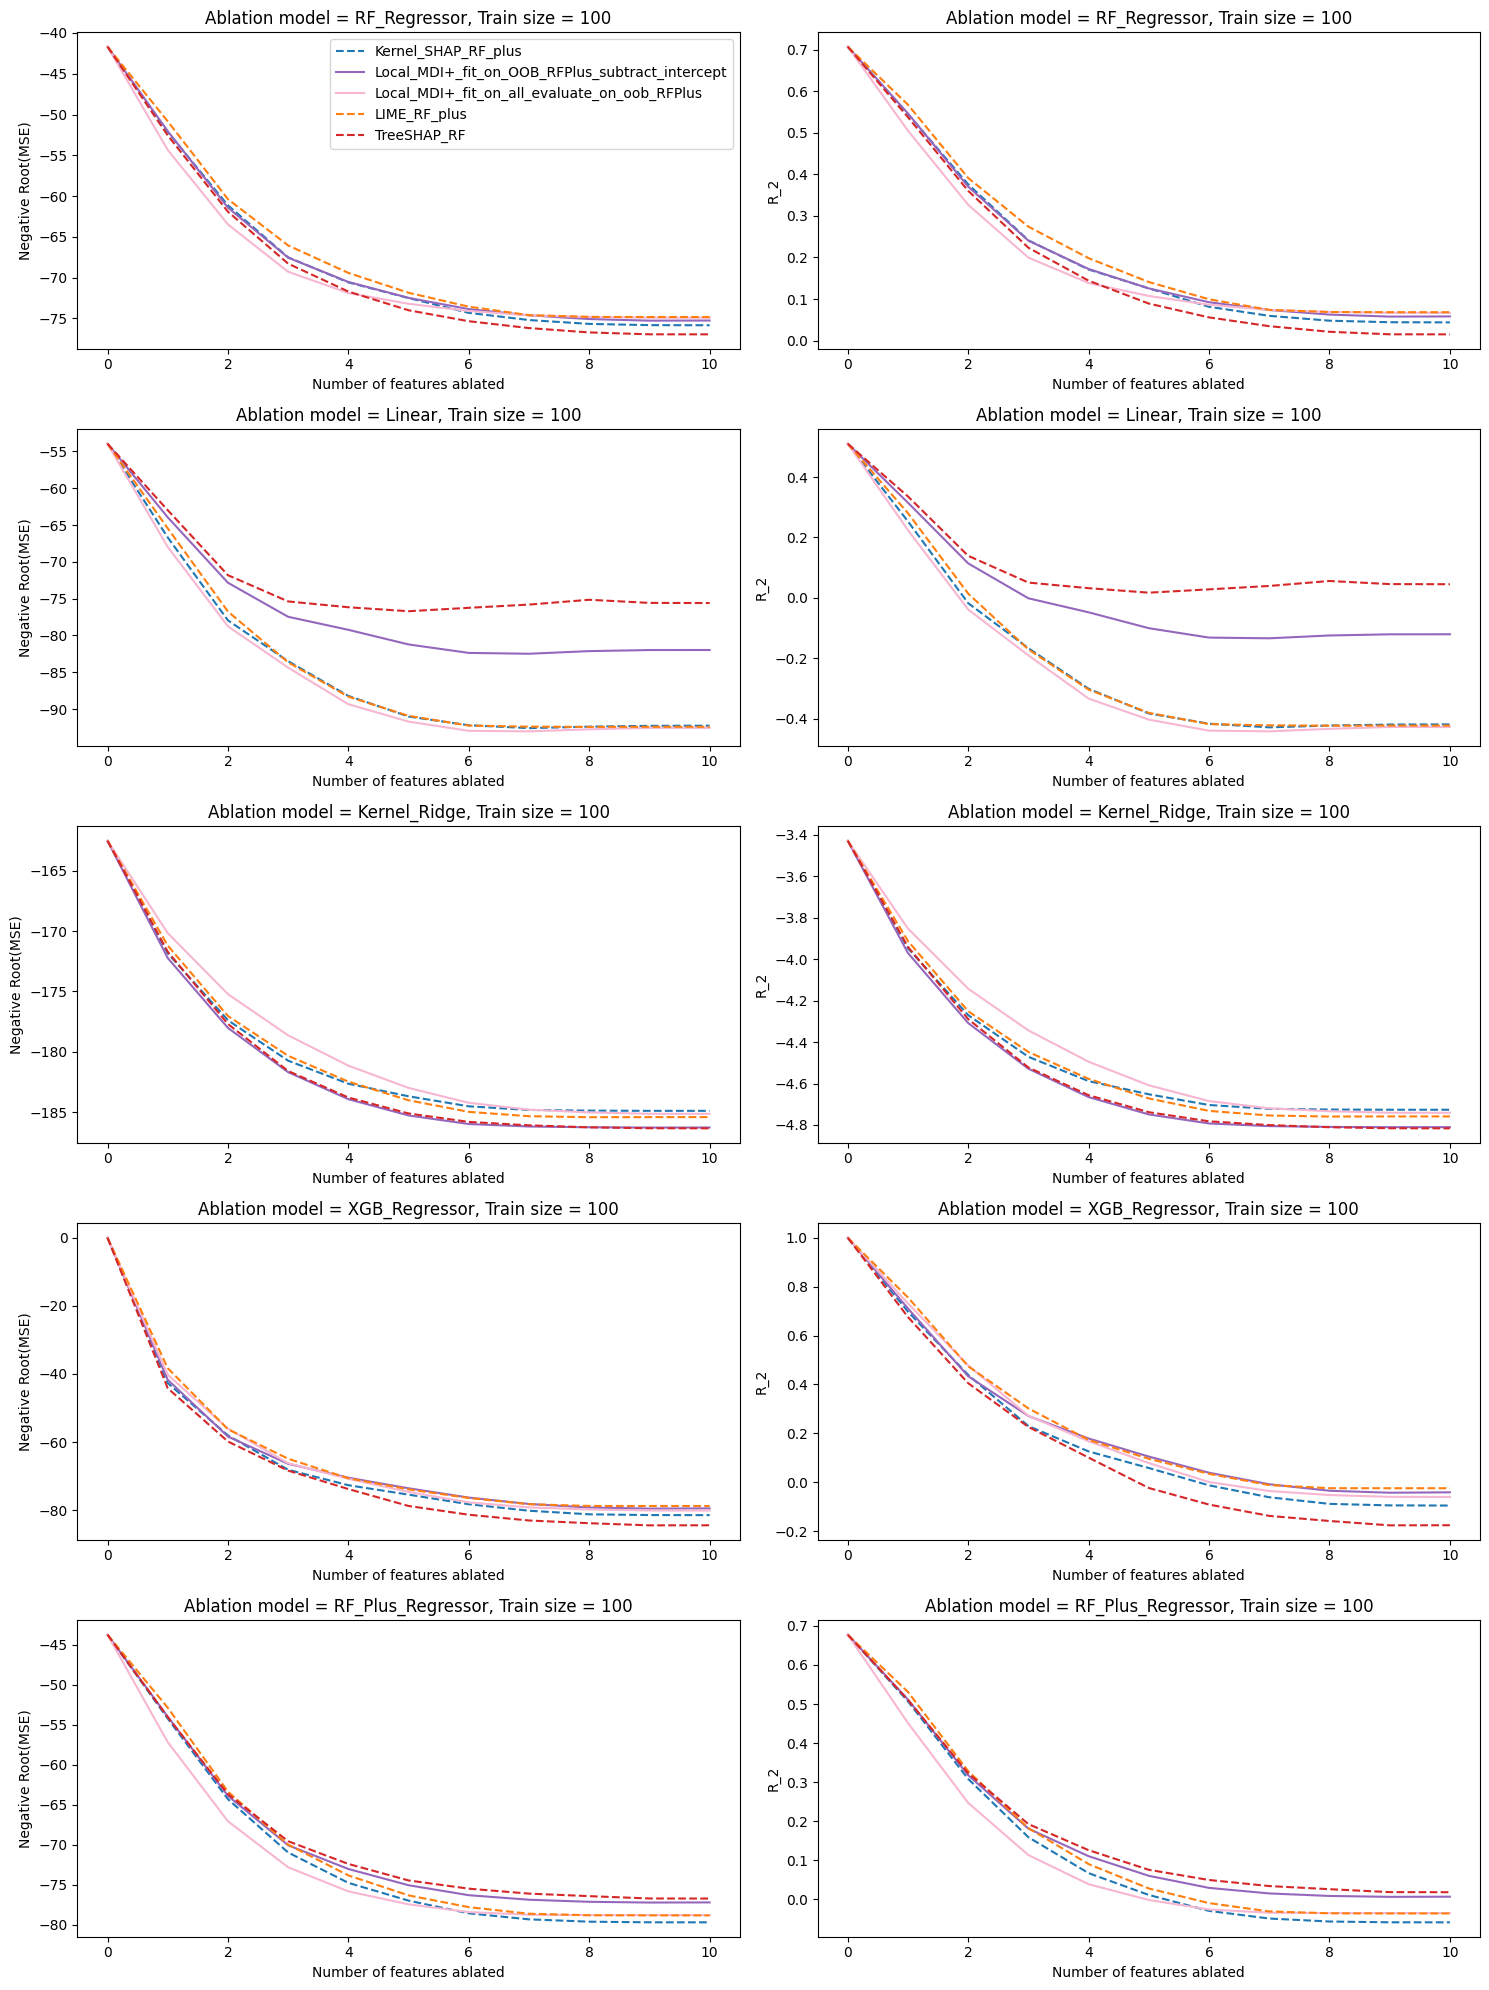

In [12]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_positive.png")
plt.show()

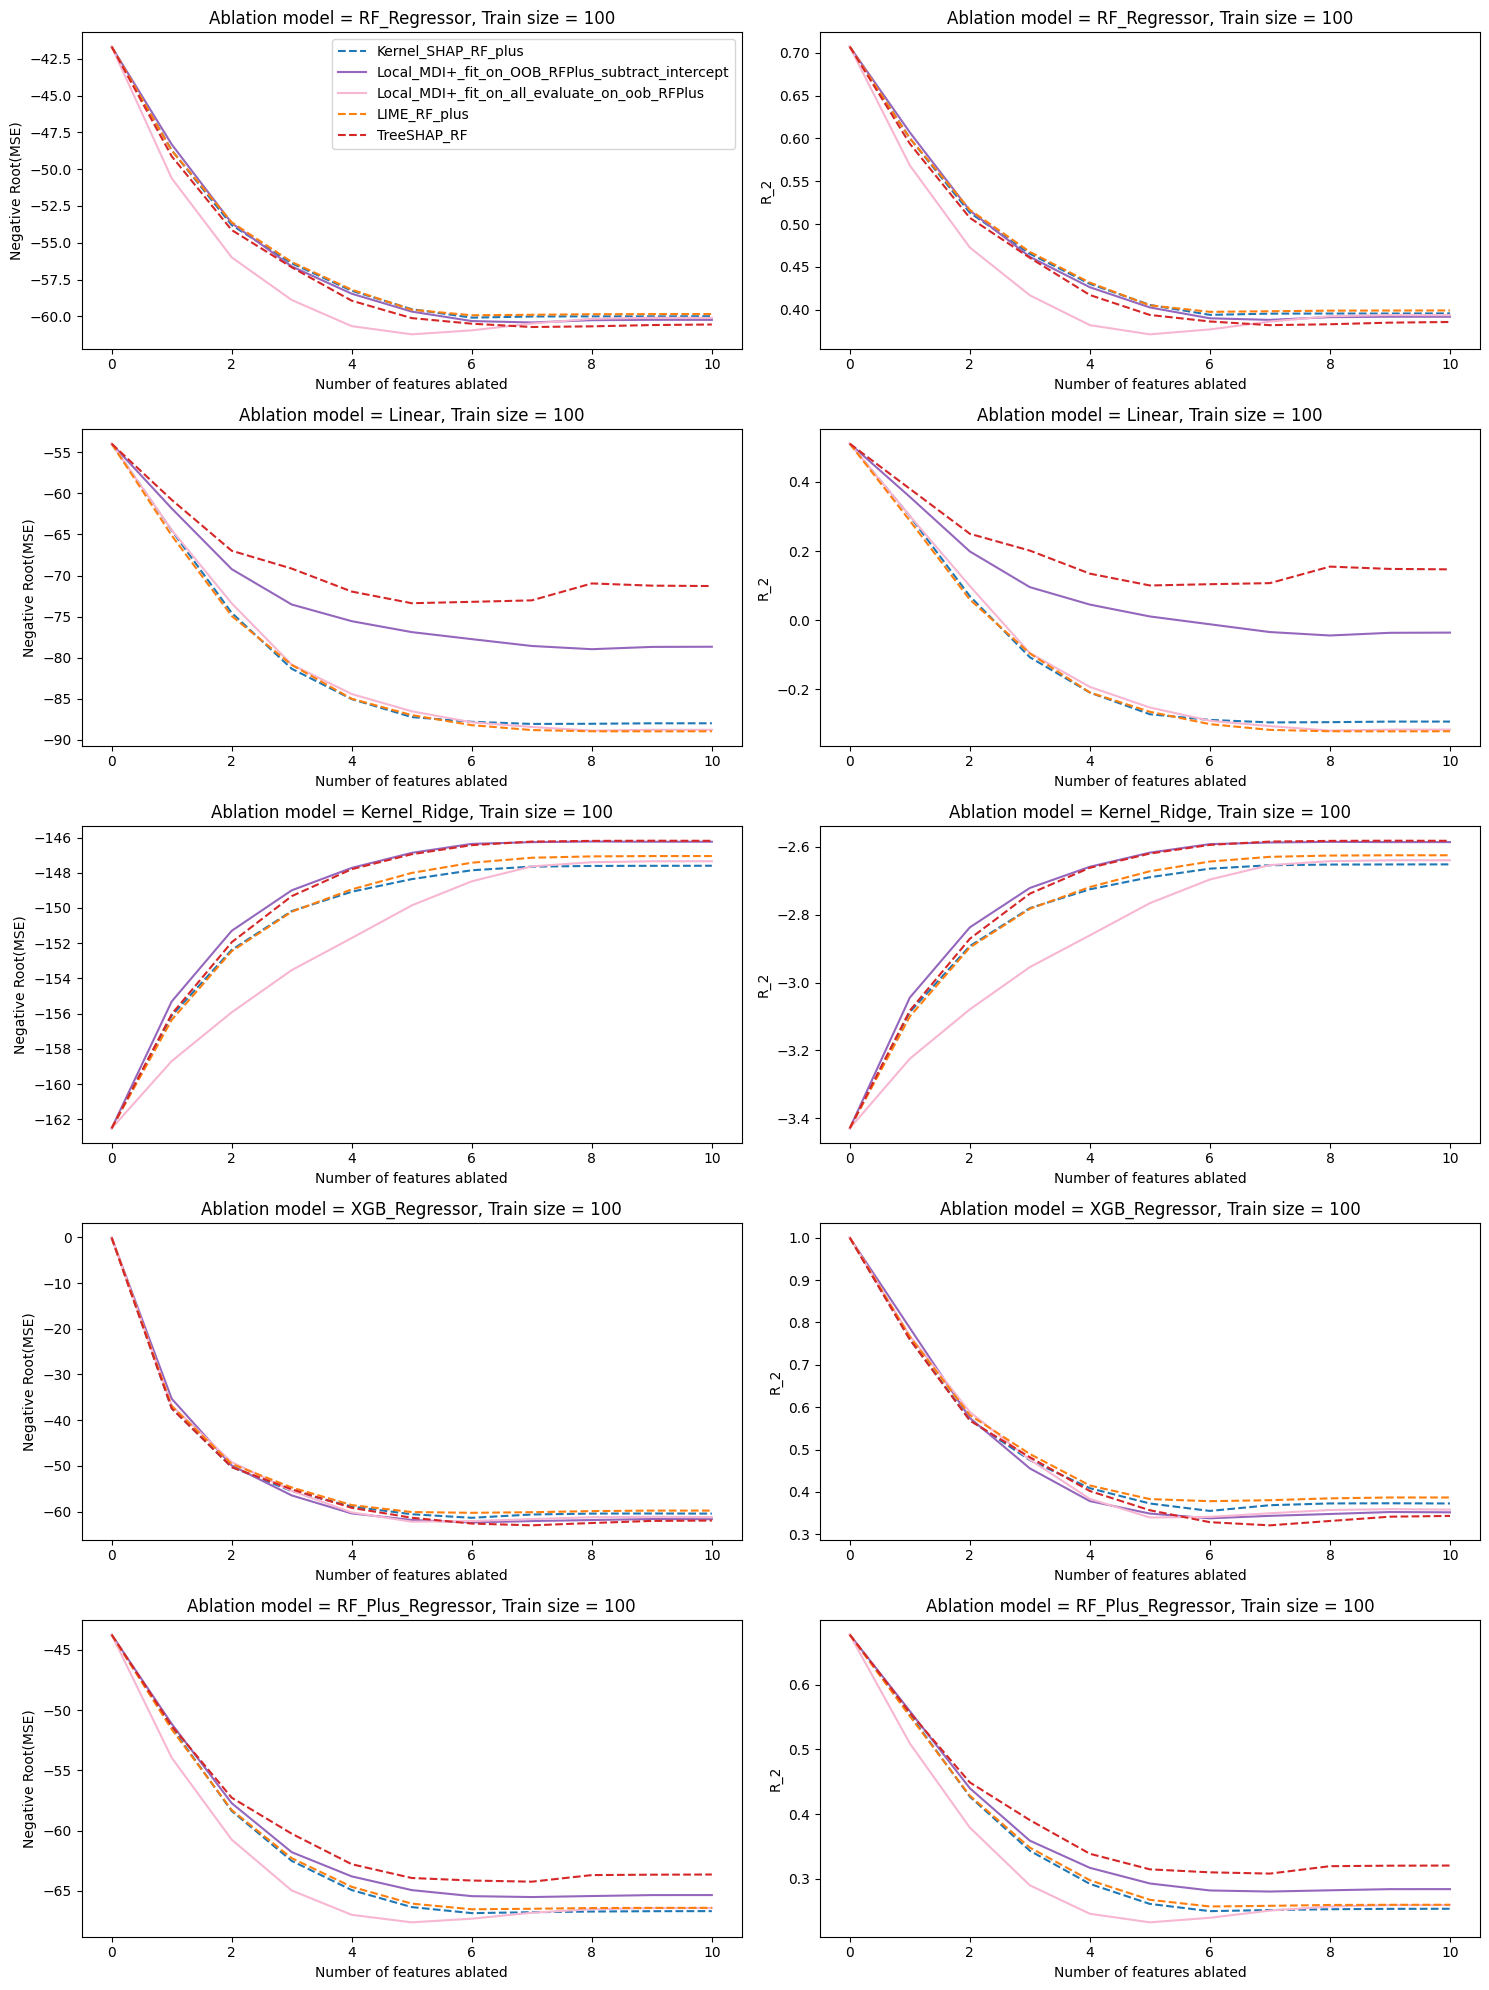

In [13]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_negative.png")
plt.show()

In [14]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_train_addition.png")
# plt.show()

#### Test Subset Data

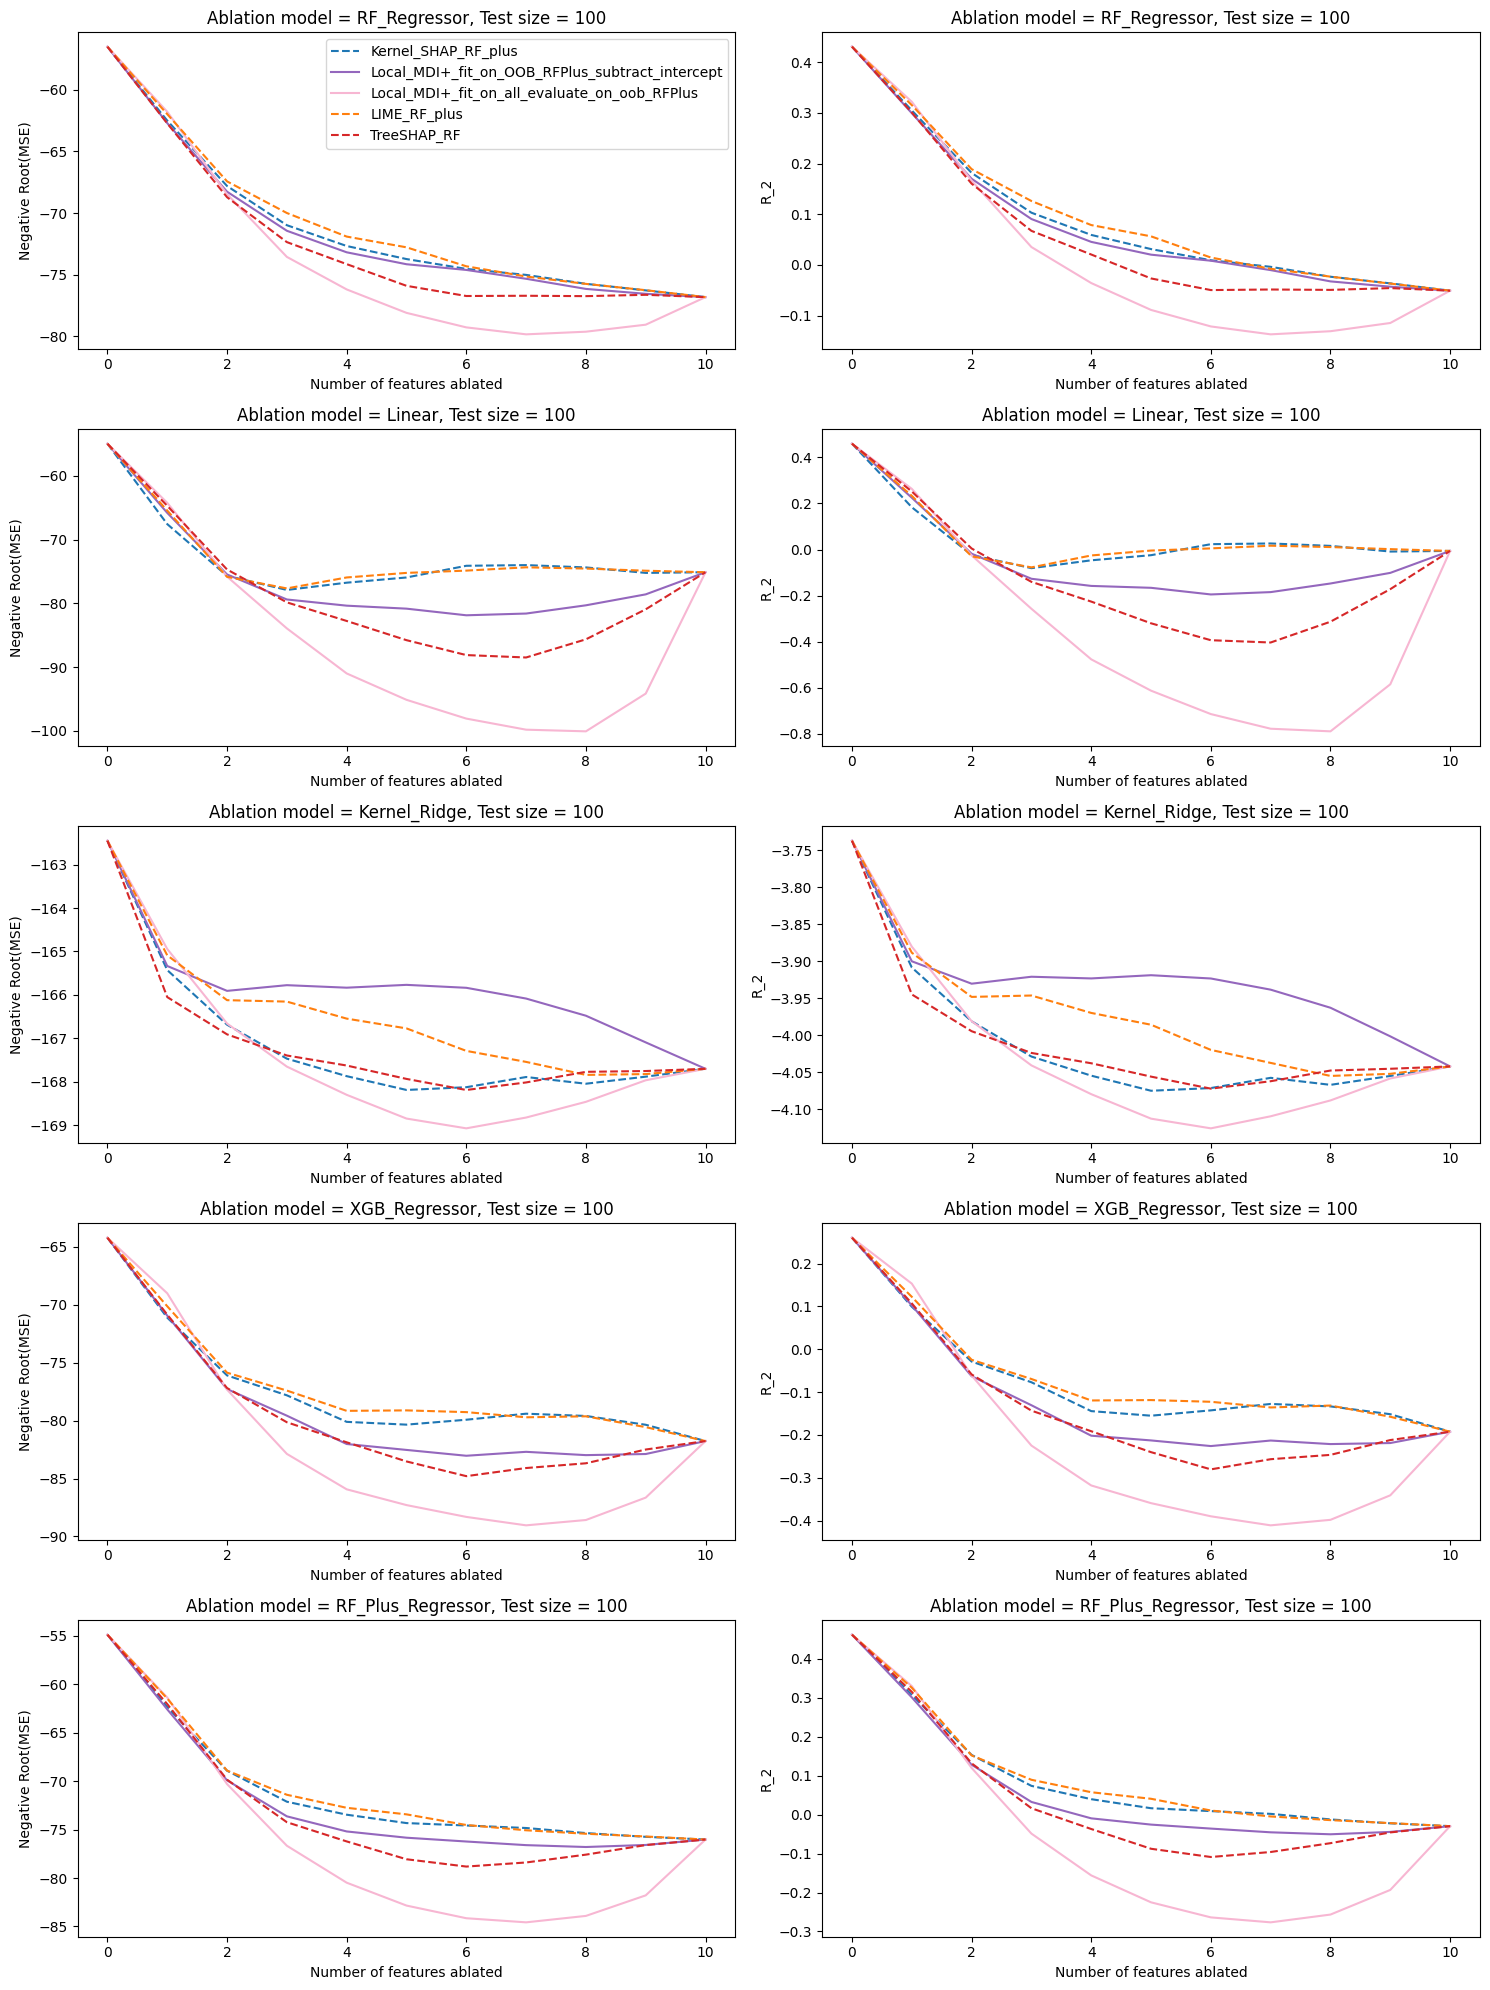

In [15]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

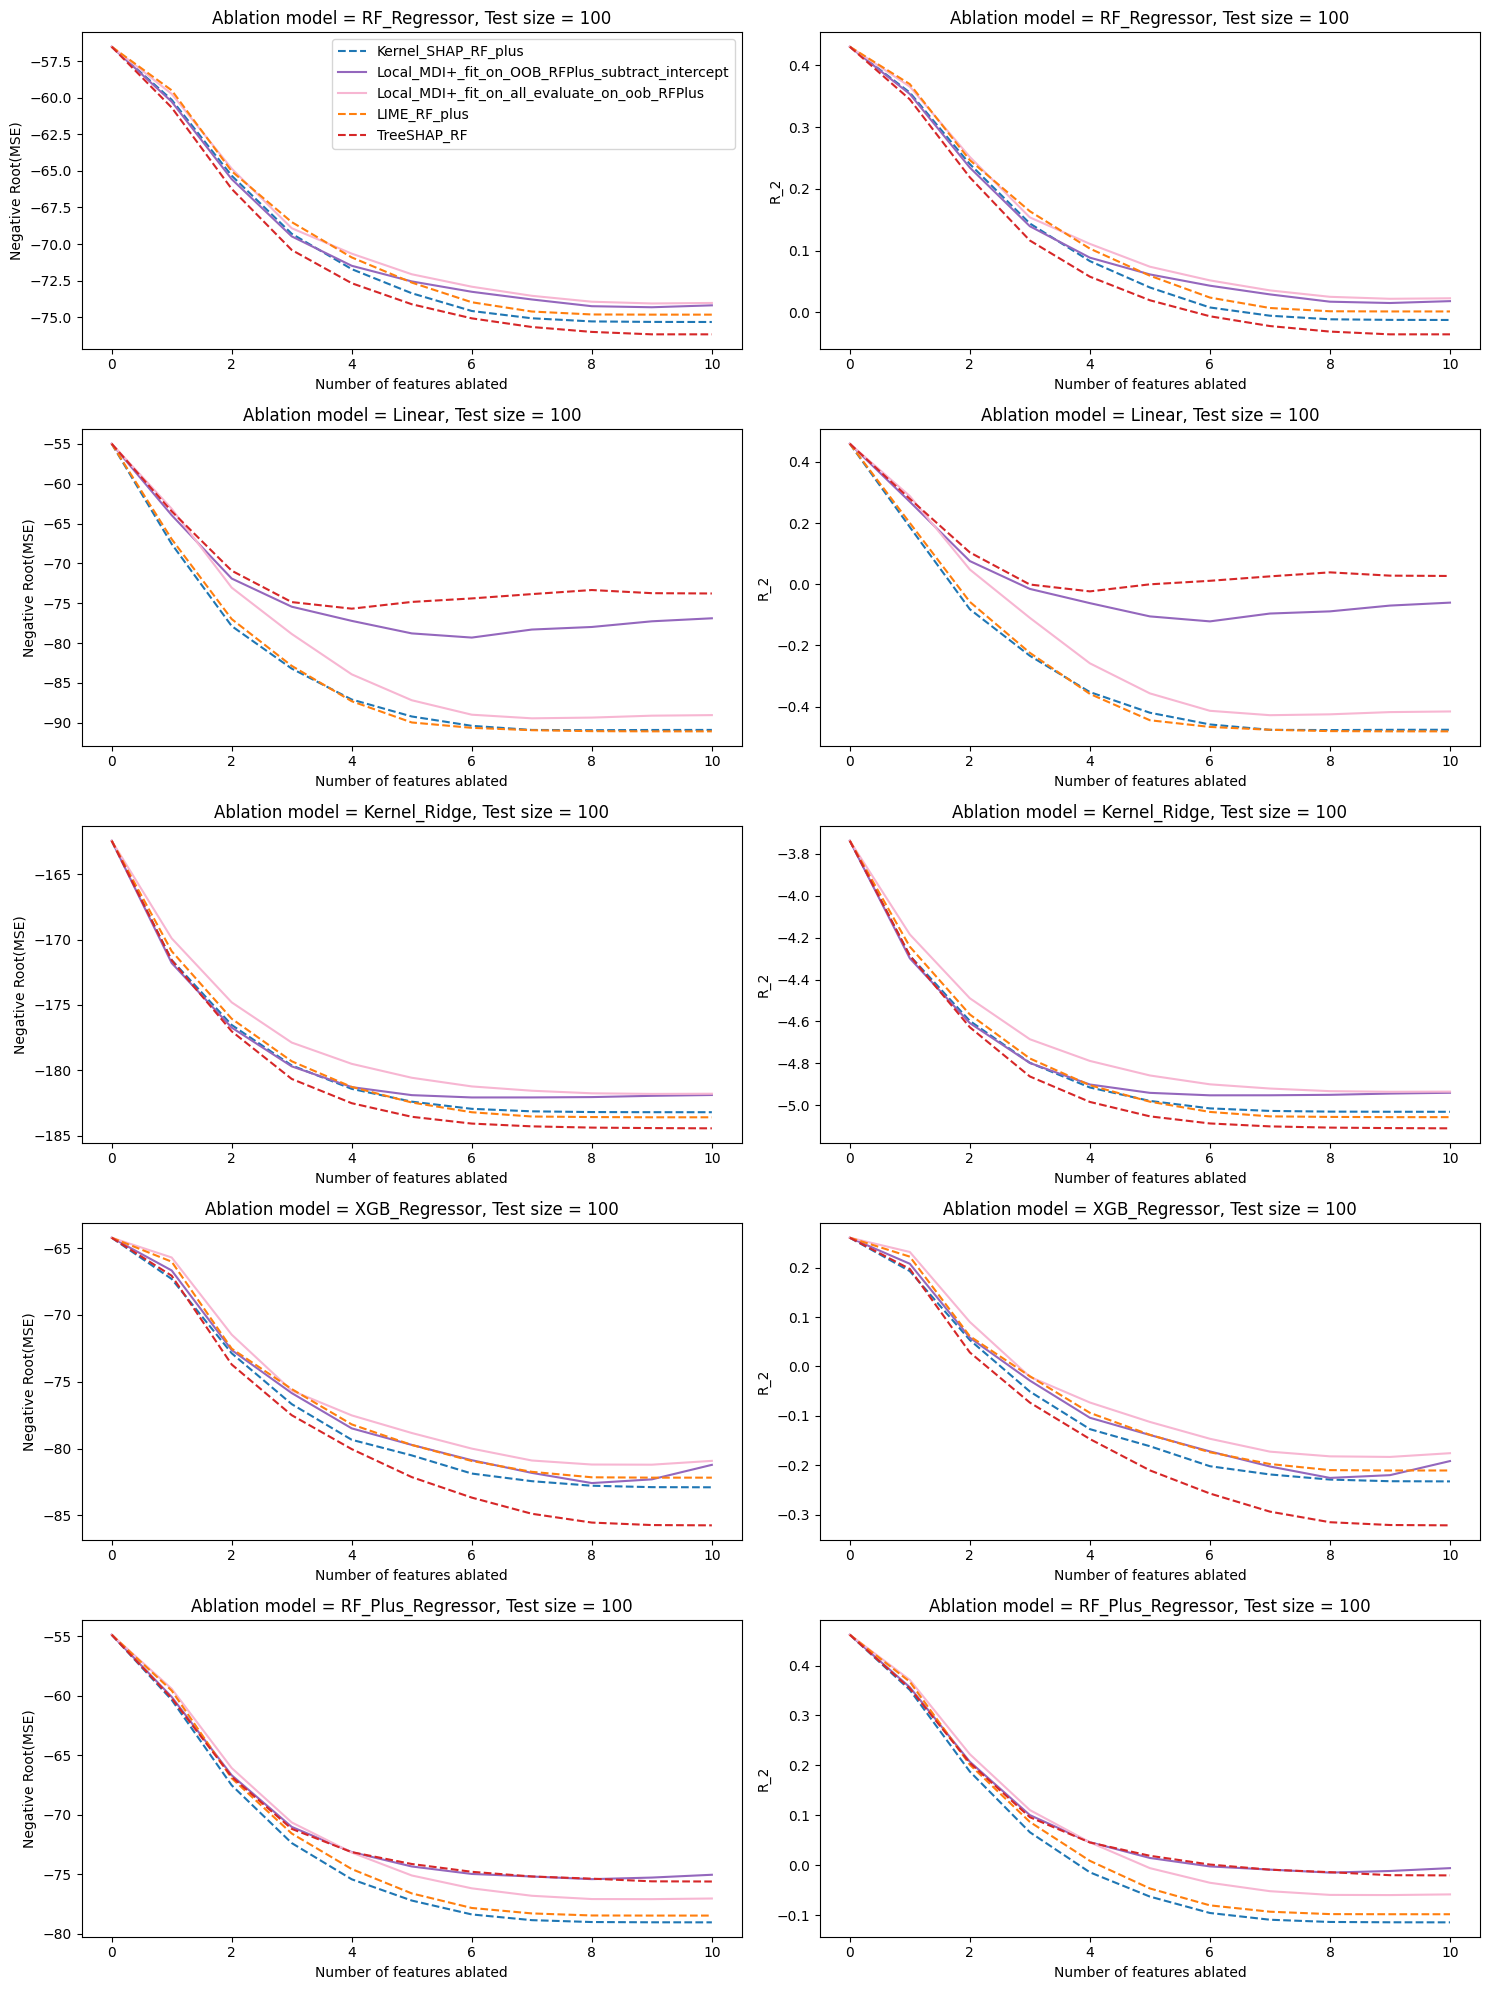

In [16]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_positive.png")
plt.show()

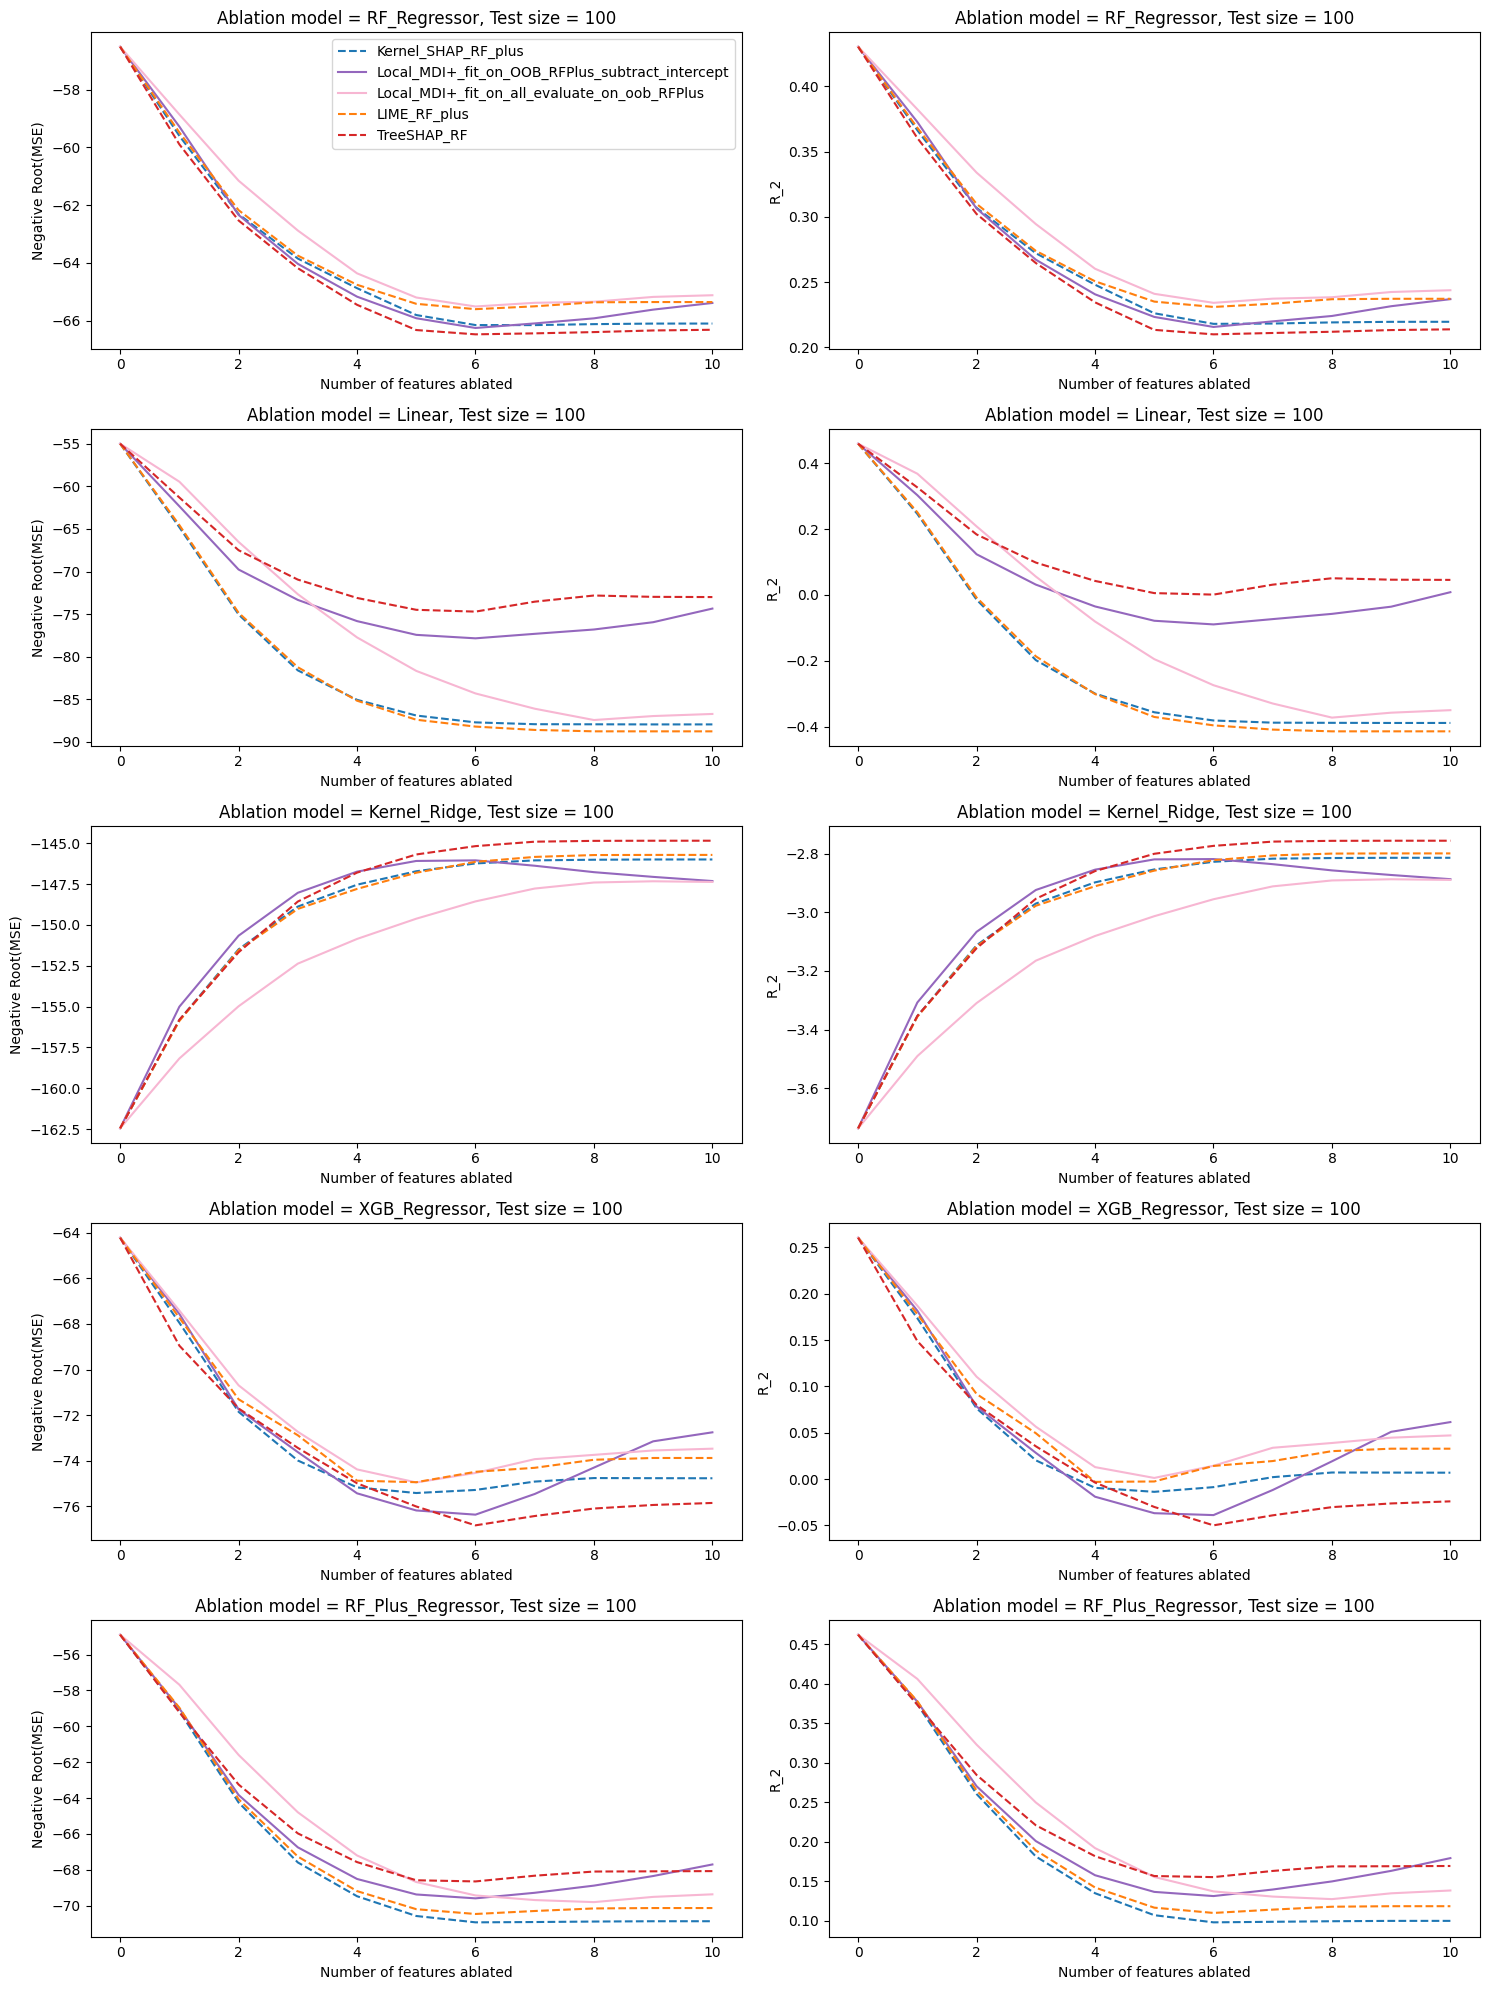

In [17]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_negative.png")
plt.show()

In [18]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test_subset:
#             results[m] = []
#         for m in methods_test_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_test_subset_addition.png")
# plt.show()

#### Test Data

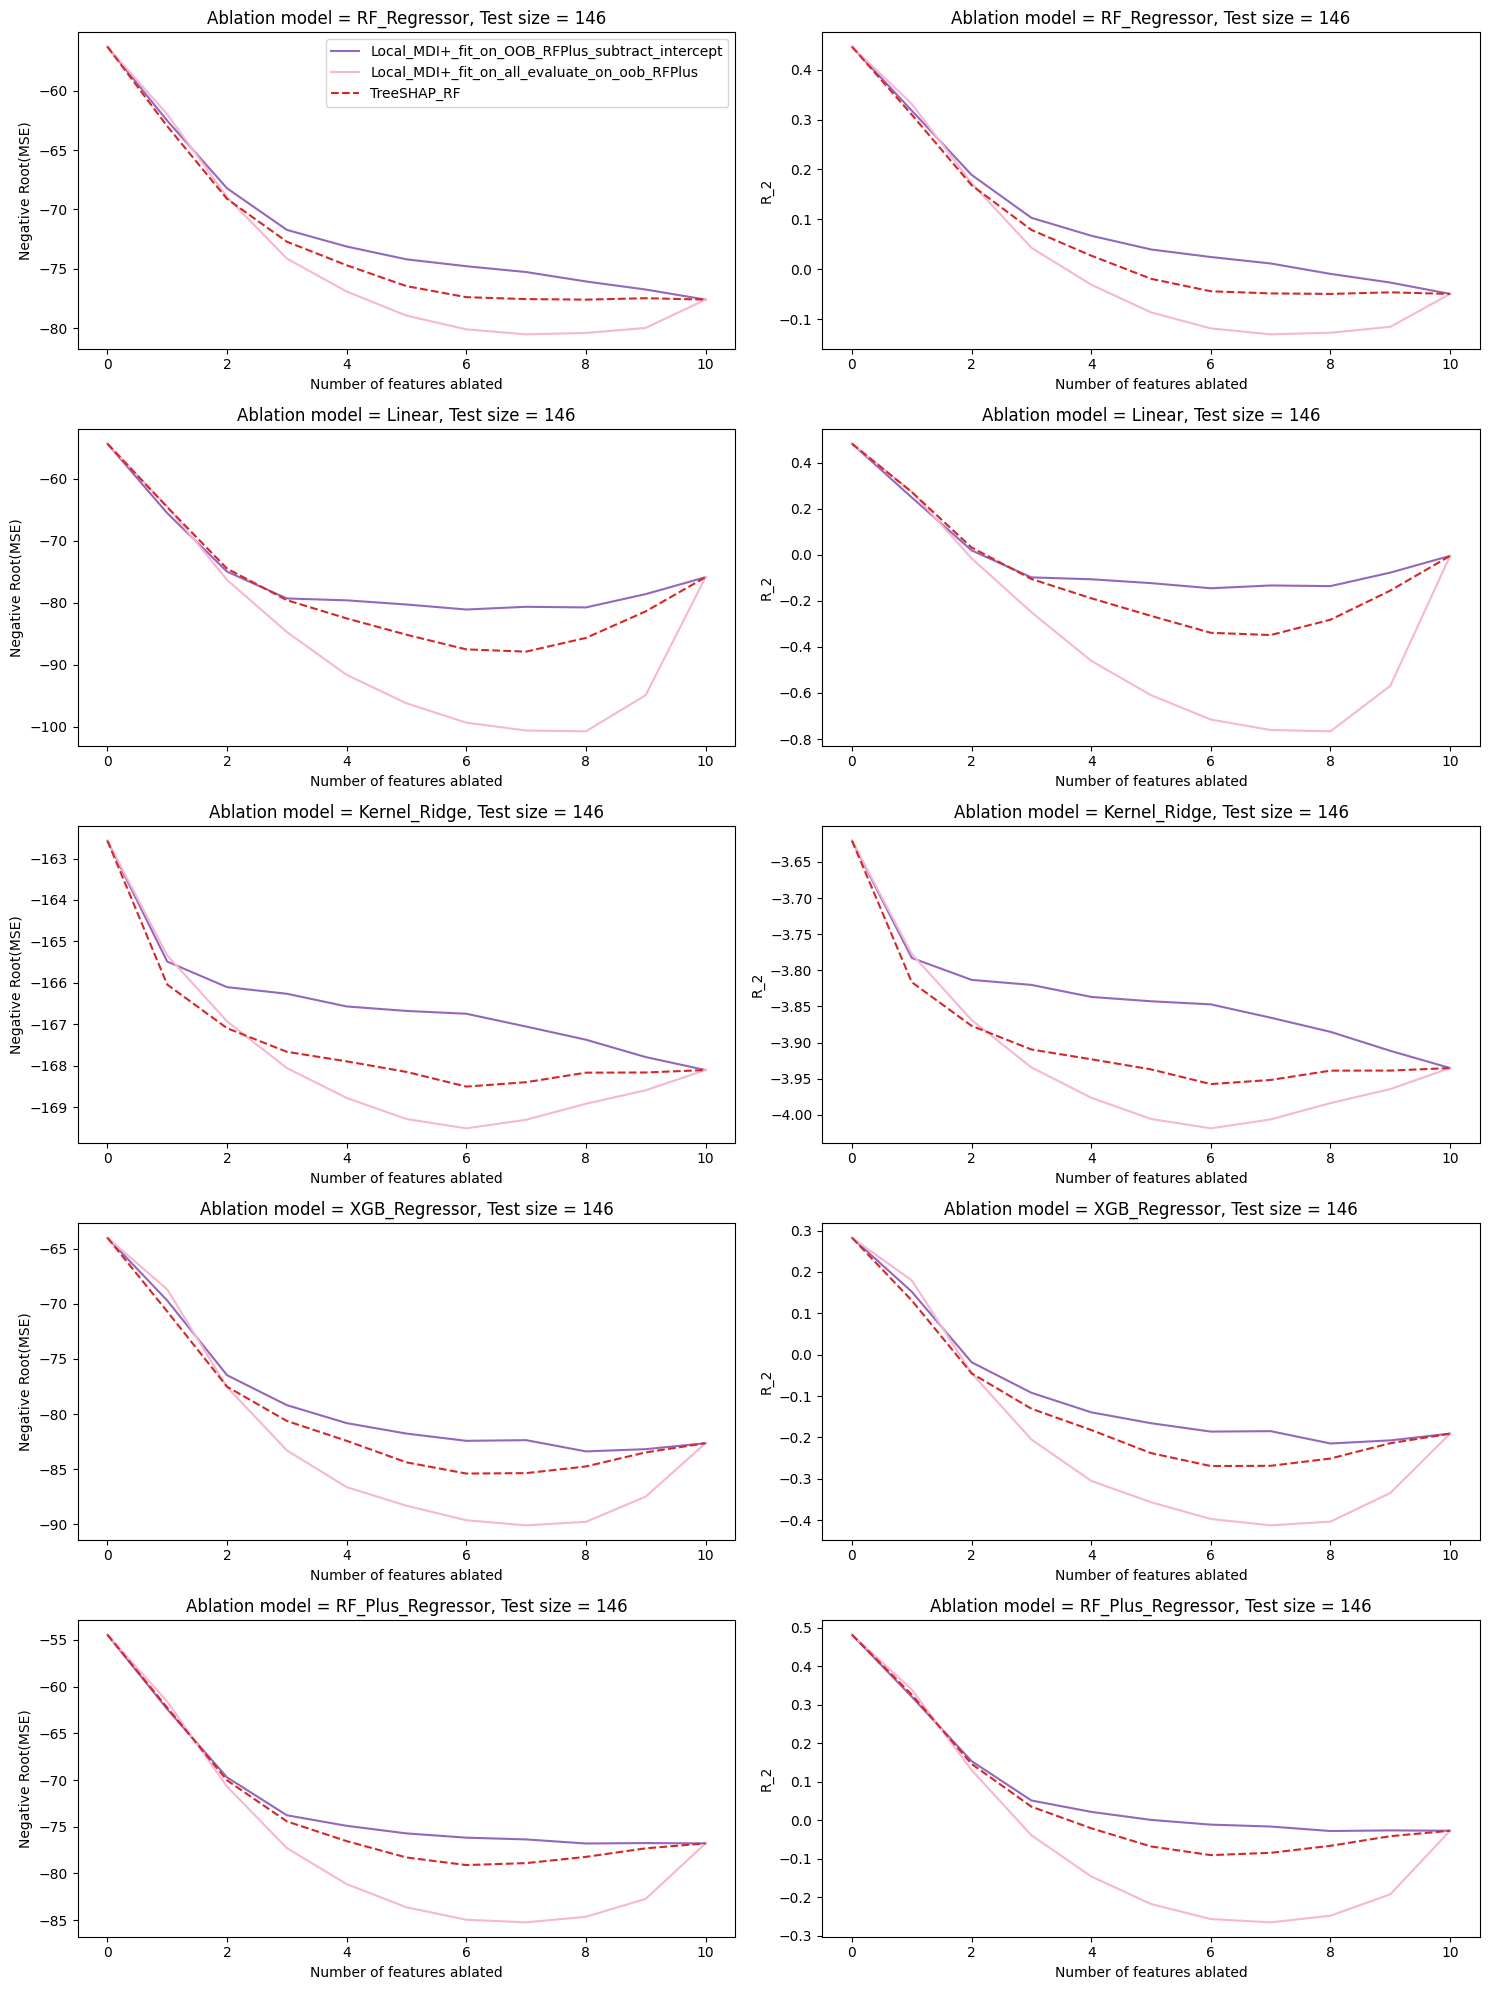

In [19]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

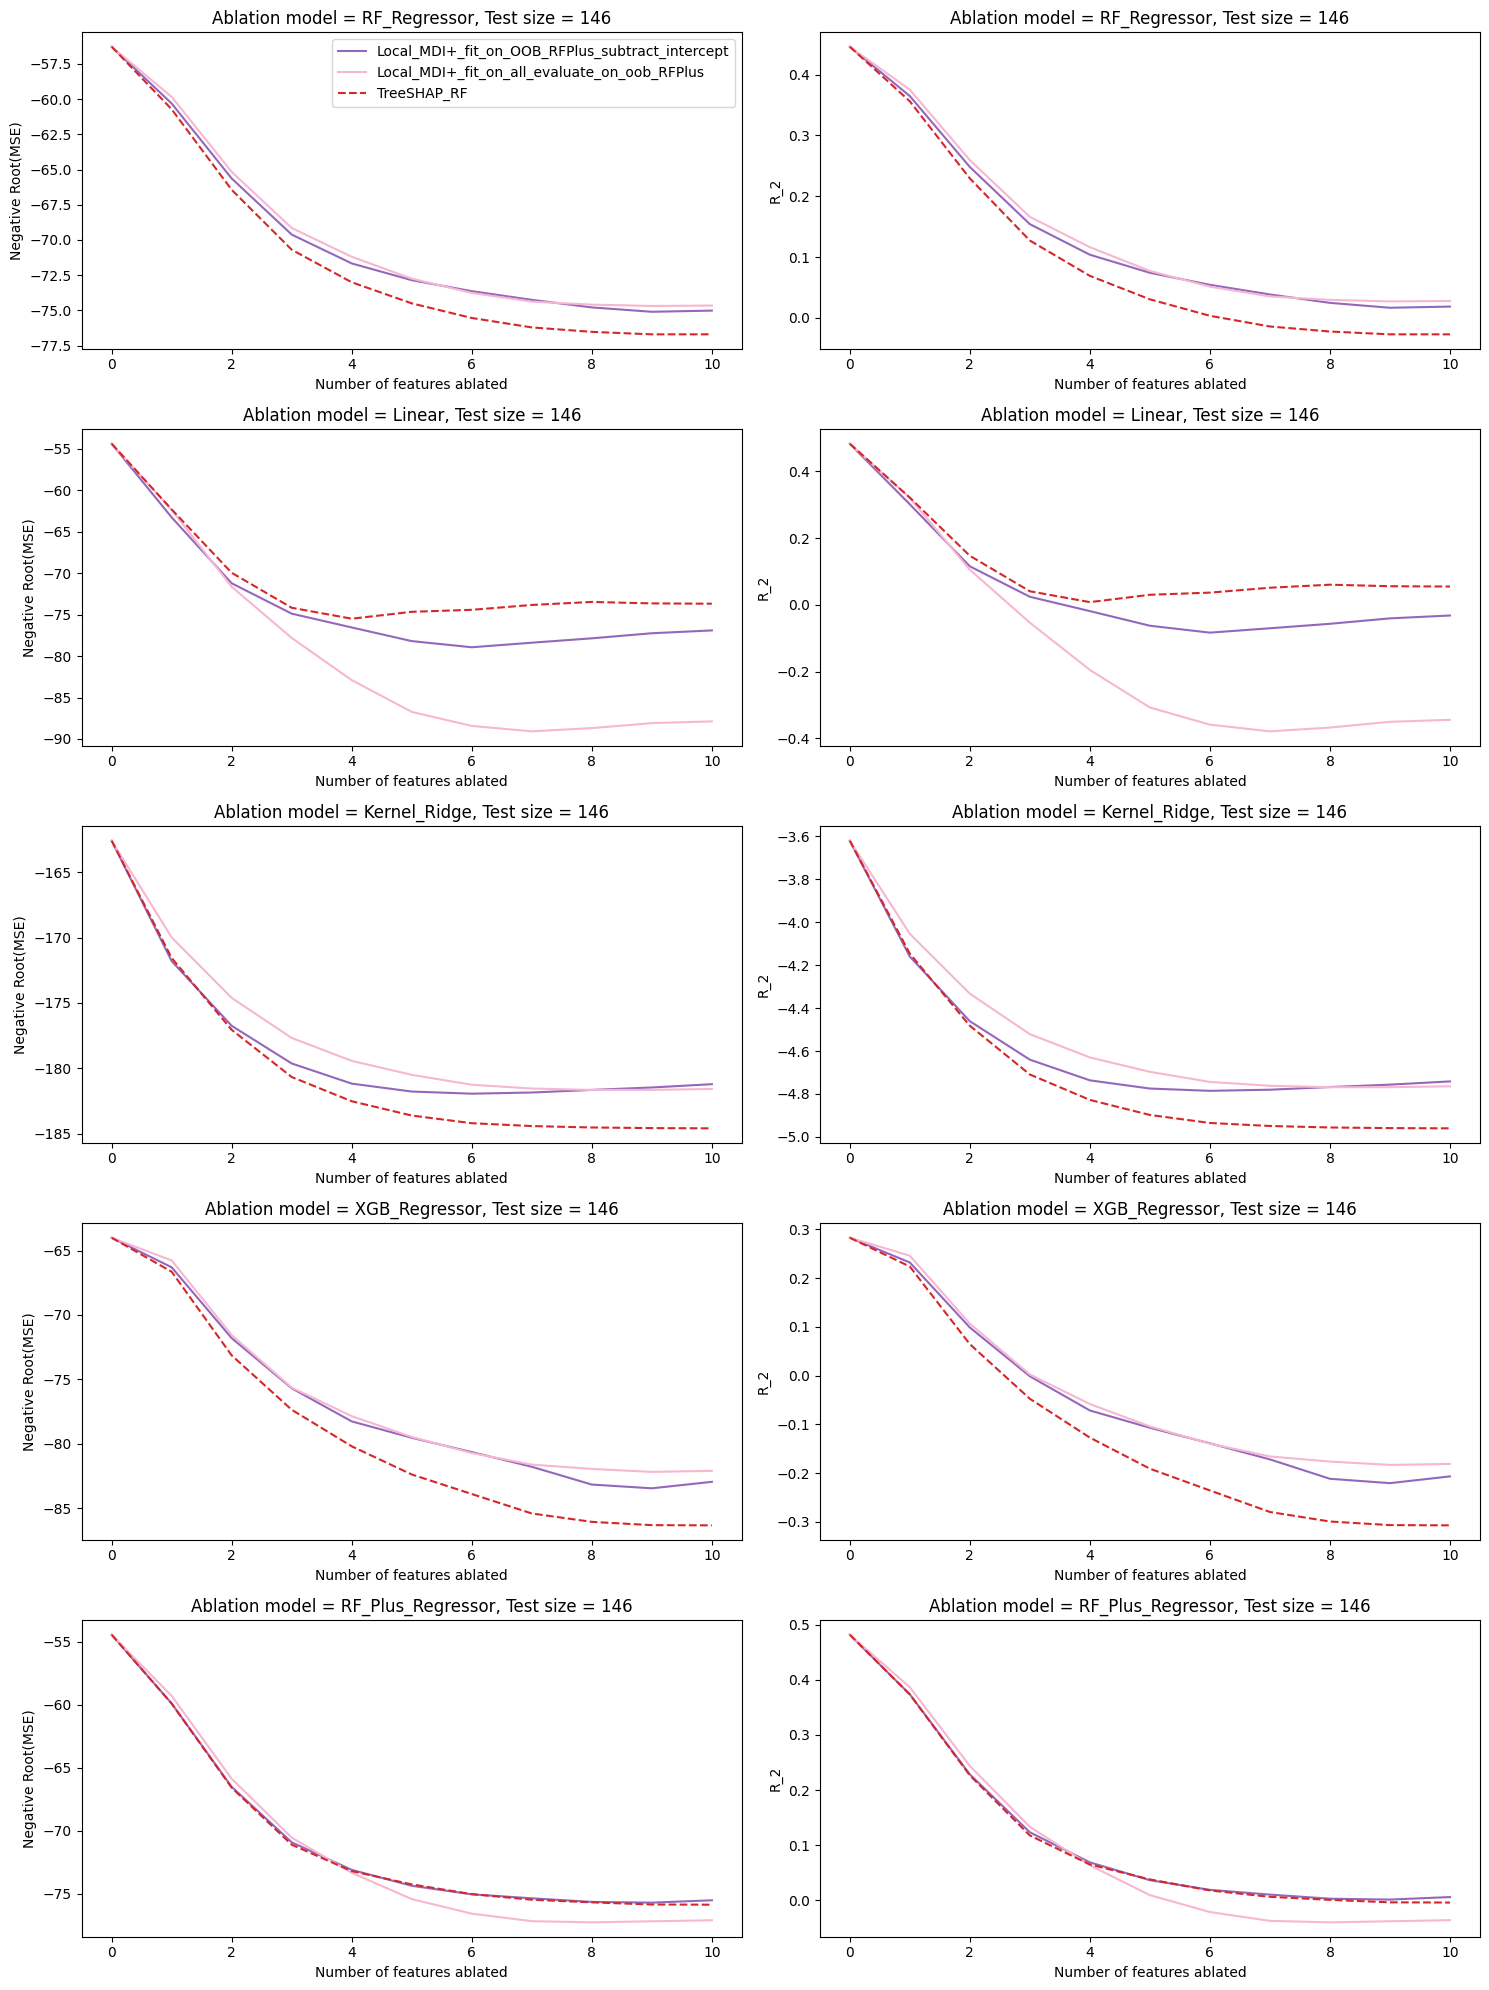

In [20]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_positive.png")
plt.show()

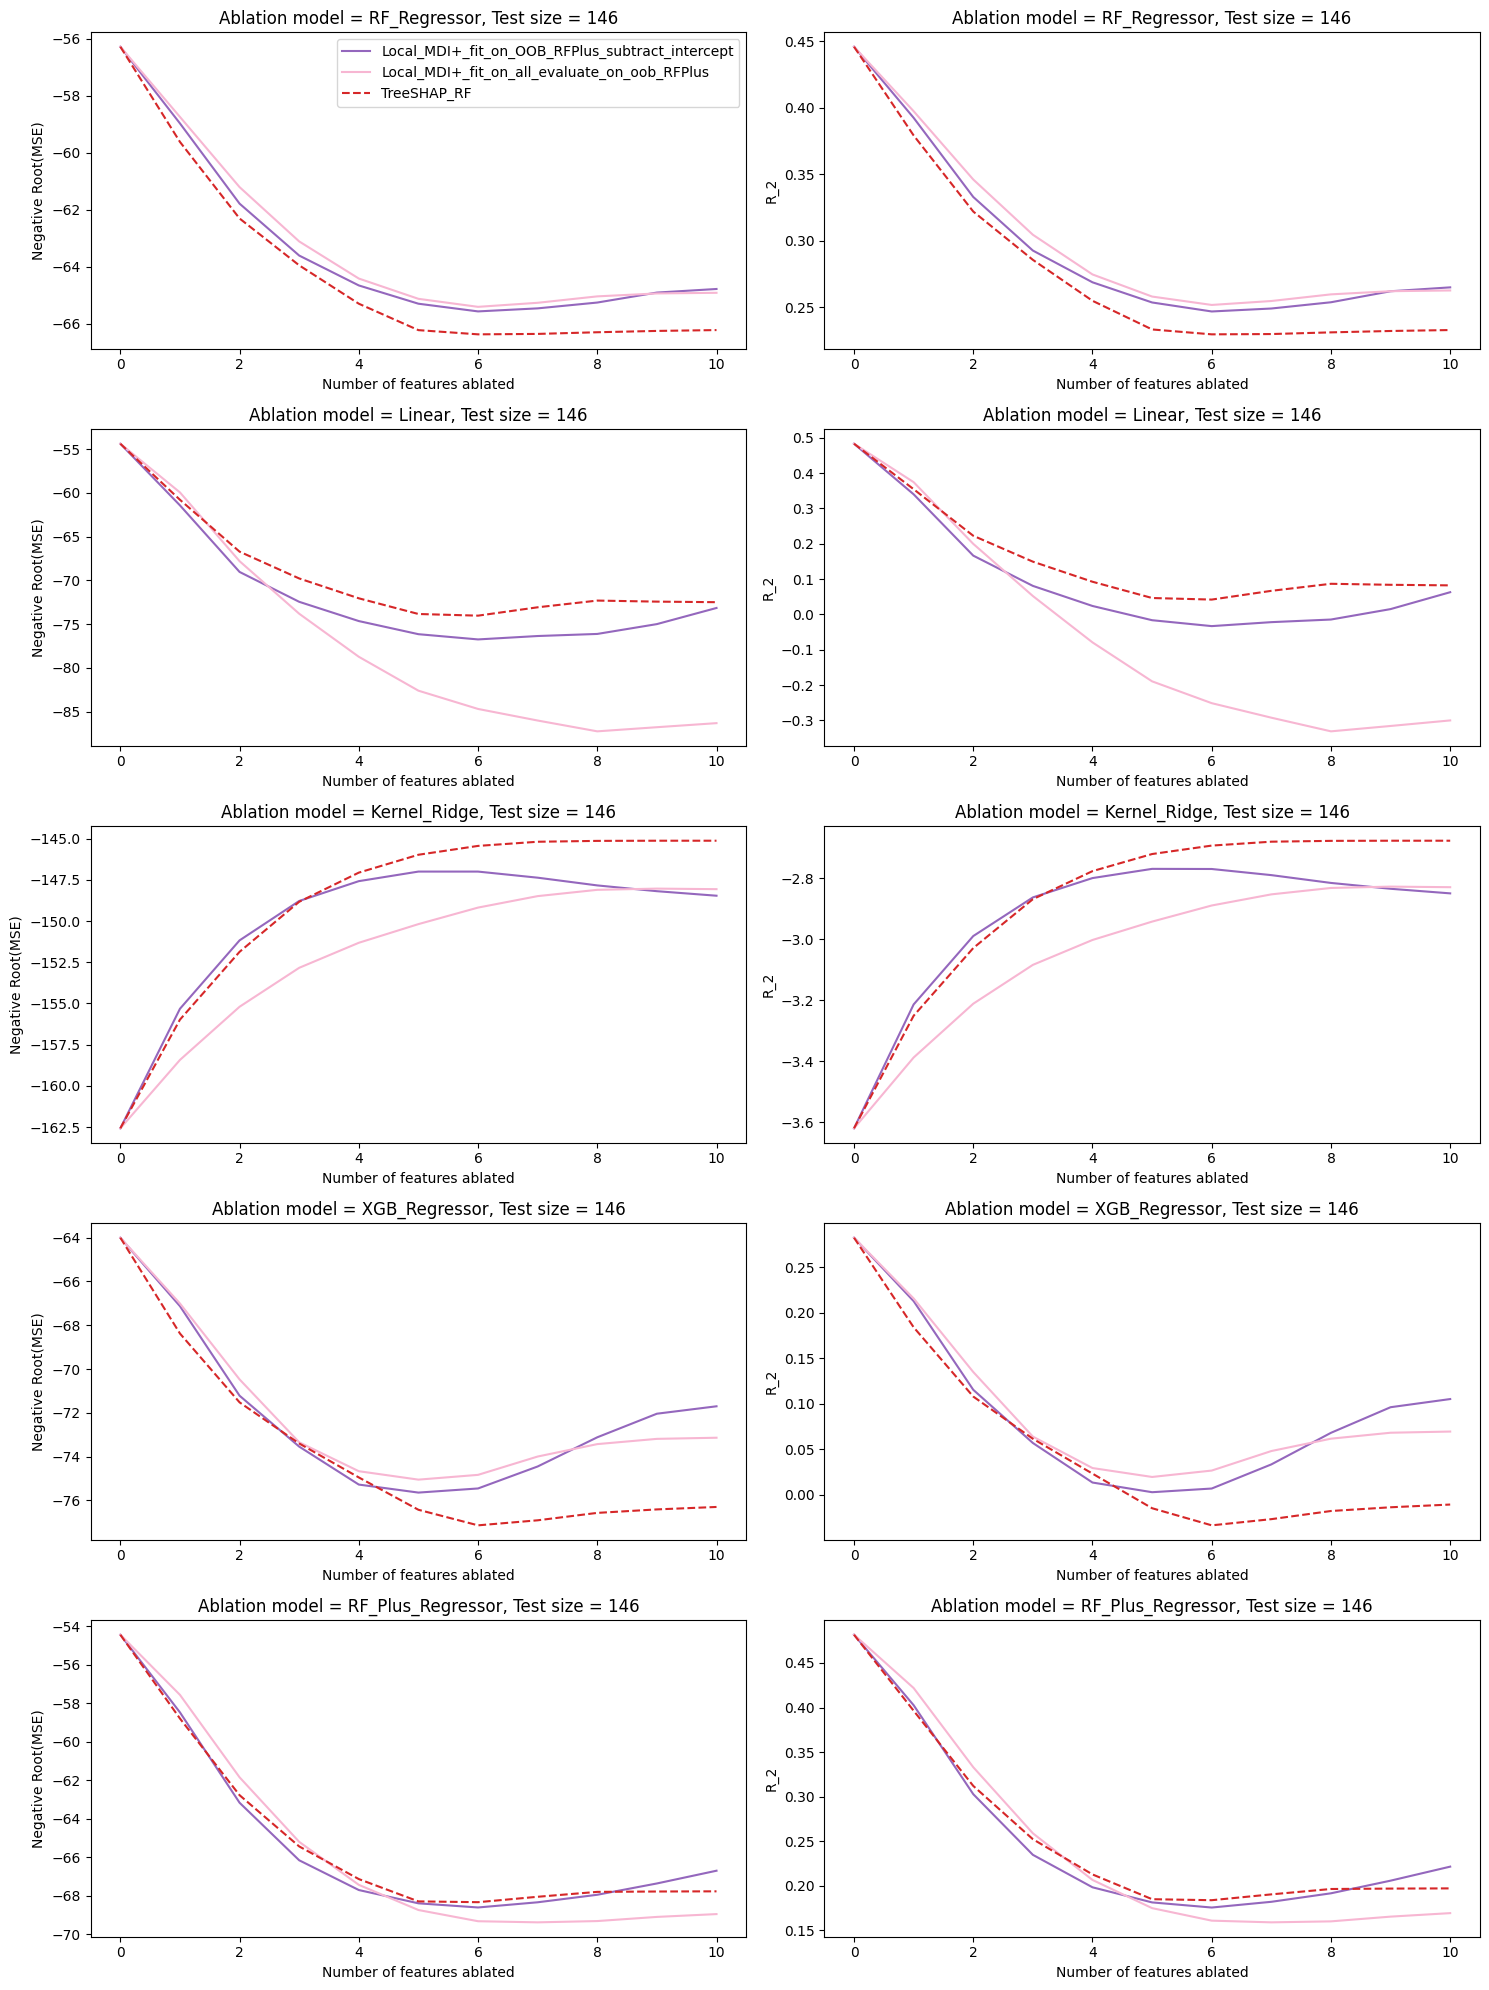

In [21]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_negative.png")
plt.show()

In [22]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test:
#             results[m] = []
#         for m in methods_test:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = {test_size}')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = {test_size}')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_test_addition.png")
# plt.show()